## MAC0459/MAC05865 - Data Science and Engineering 

Name: Guilherme Costa Vieira
NUSP: 9790930

### Decision trees exercises
---

**Q1. What is the approximate depth of a Decision Tree trained (without restrictions) on a training set with 10 million instances?**

Since most decision tree algorithms consider binary decision trees, we could say the approximate depth is $\lceil \log_{2} 10000000\rceil = 24$

**Q2. Is a node’s Gini impurity generally lower or greater than its parent? Is it generally lower (greater), or always lower (greater)?**

Let us show that the Gini impurity is generally lower than its parent. The Gini impurity is defined as:

$$ i(N) = \sum\limits_{i \neq j} P(W_{i}|N)P(w_{j}|N) = \frac{1}{2} \left[1 - \sum\limits_{j}P^2(W_{j}|N)\right] $$

Define:

$P(W|N) = \frac{w}{n}$ where $w = \#W$ and $n = \#N$

Define $N_{p}$ and $N_{c}$ as the parent node and the child node respectively, $d_{i} = w_{i} - u_{i}$, $d = \sum\limits_{i} d_{i}$ and $d > 0, n > 1$.

$$i(N_{p}) = \frac{1}{2} \left[1 - \sum\limits_{j}\left(\frac{w_{j}}{n}\right)^2\right] = \frac{1}{2} \left[1 - \frac{\sum\limits_{j} w_{j}^2}{n^2}\right]
$$

$$i(N_{c}) = \frac{1}{2} \left[1 - \sum\limits_{j}\left(\frac{u_{j}}{n - d}\right)^2\right] = \frac{1}{2} \left[1 - \sum\limits_{j}\left(\frac{w_{j} - d_{j}}{n - d}\right)^2\right] =  \frac{1}{2} \left[1 - \frac{ \sum\limits_{j}w_{j}^2 - 2\sum\limits_{j}w_{j}d_{j} + \sum\limits_{j}d_{j}^2}{n^2 - 2nd + d^2}\right] = \frac{1}{2} \left[1 - \frac{ \sum\limits_{j}w_{j}^2 - 2nd + \sum\limits_{j}d_{j}^2}{n^2 - 2nd + d^2}\right]
$$

Now, we need to show that $i(N_{p}) - i(N_{c}) > 0$:

$$i(N_{p}) - i(N_{c}) = \frac{1}{2} \left[1 - \frac{\sum\limits_{j} w_{j}^2}{n^2}\right] - \frac{1}{2} \left[1 - \frac{ \sum\limits_{j}w_{j}^2 - 2nd + \sum\limits_{j}d_{j}^2}{n^2 - 2nd + d^2}\right] = \frac{1}{2} \left[1 - \frac{\sum\limits_{j} w_{j}^2}{n^2} - \left(1 - \frac{ \sum\limits_{j}w_{j}^2 - 2nd + \sum\limits_{j}d_{j}^2}{n^2 - 2nd + d^2}\right) \right] = \frac{1}{2} \left[-\frac{\sum\limits_{j} w_{j}^2}{n^2} + \frac{ \sum\limits_{j}w_{j}^2 - 2nd + \sum\limits_{j}d_{j}^2}{n^2 - 2nd + d^2}\right]
$$

Thus, we must show that $\frac{ \sum\limits_{j}w_{j}^2 - 2nd + \sum\limits_{j}d_{j}^2}{n^2 - 2nd + d^2} - \frac{\sum\limits_{j} w_{j}^2}{n^2} > 0$

$$\frac{ \sum\limits_{j}w_{j}^2 - 2nd + \sum\limits_{j}d_{j}^2}{n^2 - 2nd + d^2} - \frac{\sum\limits_{j} w_{j}^2}{n^2} = \left(\frac{1}{(n^2 - 2nd + d^2)n^2}\right)\left(n^2\sum\limits_{j}w_{j}^2 - 2n^3d + n^2\sum\limits_{j}d_{j}^2 - n^2\sum\limits_{j}w_{j}^2 + 2nd\sum\limits_{j}w_{j}^2 - d^2\sum\limits_{j}w_{j}^2\right) =
\left(\frac{1}{(n^2 - 2nd + d^2)n^2}\right)\left(n^2\sum\limits_{j}d_{j}^2 + 2nd\sum\limits_{j}w_{j}^2- 2n^3d -  d^2\sum\limits_{j}w_{j}^2\right) = \left(\frac{1}{(n^2 - 2nd + d^2)n^2}\right)\left(n^2\sum\limits_{j}d_{j}^2 + 2nd(\sum\limits_{j}w_{j}^2 - n^2) - d^2\sum\limits_{j}w_{j}^2\right)
$$

**Q3. If a Decision Tree is overfitting the training set, is it a good idea to try decreasing maxdepth? Why?**

Yes, when we decrease the maxdepth we are also reducing the information gain that the last depth would have gained. Hence this new decision tree is less specialized in the training set.

**Q4. If a Decision Tree is underfitting the training set, is it a good idea to try scaling the input features? Why?**

No, scaling the input features is good when our classifier relies on Eucliadean distance. The decision trees relies on information gain to make the splits and the information gain measurents make use of probabilities, not Eucliadean distance.

**Q5. If it takes one hour to train a Decision Tree on a training set containing 10 million instances, roughly how much time will it take to train another Decision Tree on a similar training set containing 100 million instances?**

The [Scikit-learn documentation of the decision trees](https://scikit-learn.org/stable/modules/tree.html#complexity) states that the complexity of the training algorithm is $O(n_{features}n_{samples}^{2}\log(n_{samples}))$.

The $n_{features}$ is the same for both trainings. By a simple cross- multiplication we can make the following estimation:

$$\frac{n_{features}(10^7)^2\log(n_{10^7})}{n_{features}(10^8)^2\log(n_{10^7})} = \frac{60}{x} \implies \frac{10^{14} * 24}{10^{16} * 27} \approx \frac{60}{x} \implies x \approx \frac{10^{16} * 27 * 60}{10^{14} * 24} \implies x \approx \frac{100 * 27 * 60}{24}
$$

$$
\implies x \approx \frac{100 * 27 * 60}{24} \implies x \approx \frac{162000}{24} \implies x \approx 6750
$$

Hence, it will take approximately 6750 minutes or 112 hours and 30 minutes.

**Q6.** **Train and  fine-tune a Decision Tree for the Cardiovascular Disease dataset. The dataset has very few information on acquisition protocol except that all of the dataset values were collected at the moment of medical examination. There are three types of input features:**

**–Objective:  factual information;**

**–Examination:  results of medical examination;**

**–Subjective:  information given by the patient.**

**Besides that, features are classified according to the following values:**

**–1:  normal,**

**–2:  above normal,**

**–3:  well above normal**

**Questions or tasks to be addressed:**

**1) Present an EDA analysis of the dataset.**

Let us import necessary data science packages, load, check and prepare the dataset if necessary.

In [29]:
import pandas as pd
from statistics import mean, median
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set()

# Loading CSV's
print("Loading Dataset")
cardio = pd.read_csv('http://linux.ime.usp.br/~guilhevieira/cardio_train.csv', error_bad_lines = False)
print("Dataset loaded successfully")
cardio.info()

Loading Dataset
Dataset loaded successfully
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [9]:
cardio.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


Okay, everything is alright. How many records do we have and how many features for each record?

In [11]:
cardio.shape

(70000, 13)

Let us generate some statistics that summarize each numerical feature, like mean, variance, min, median and and max values.

* Age (days)

In [23]:
pd.DataFrame(cardio['age'].describe())

,age
count,70000.000000
mean,19468.865814
std,2467.251667
min,10798.000000
25%,17664.000000
50%,19703.000000
75%,21327.000000
max,23713.000000


The age values are in days, which is hard for human readability because we are accustomed with years, let us see the statistics in years. 

In [22]:
age_in_years = pd.DataFrame(cardio['age'].copy())
age_in_years['age'] = age_in_years['age'].apply(lambda x: x/365)
age_in_years.describe()

,age
count,70000.000000
mean,53.339358
std,6.759594
min,29.583562
25%,48.394521
50%,53.980822
75%,58.430137
max,64.967123


* Height (cm)

In [24]:
pd.DataFrame(cardio['height'].describe())

,height
count,70000.000000
mean,164.359229
std,8.210126
min,55.000000
25%,159.000000
50%,165.000000
75%,170.000000
max,250.000000


* Weigth (kg)

In [25]:
pd.DataFrame(cardio['weight'].describe())

,weight
count,70000.000000
mean,74.205690
std,14.395757
min,10.000000
25%,65.000000
50%,72.000000
75%,82.000000
max,200.000000


* Systolic blood pressure

In [26]:
pd.DataFrame(cardio['ap_hi'].describe())

,ap_hi
count,70000.000000
mean,128.817286
std,154.011419
min,-150.000000
25%,120.000000
50%,120.000000
75%,140.000000
max,16020.000000


* Diastolic blood pressure

In [28]:
pd.DataFrame(cardio['ap_lo'].describe())

,ap_lo
count,70000.000000
mean,96.630414
std,188.472530
min,-70.000000
25%,80.000000
50%,80.000000
75%,90.000000
max,11000.000000


Alright, there are some interesting things over there. **CONCLUSIONS**

Let us move on and visualize how weel distributed the datasets are in relation to each attribute throw histograms for numerical features and bar plots for categorical values.

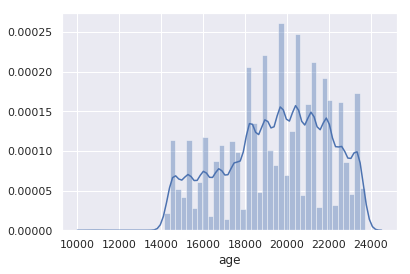

In [31]:
sns.distplot(cardio['age'])

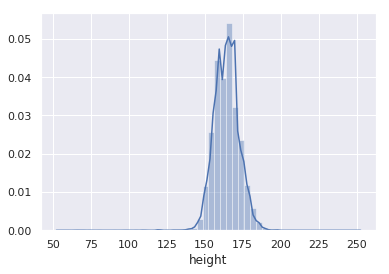

In [33]:
sns.distplot(cardio['height'])

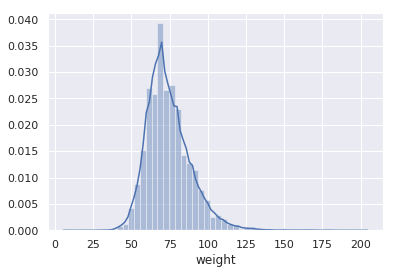

In [35]:
sns.distplot(cardio['weight'])

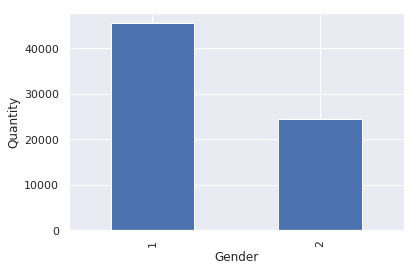

In [38]:
cardio['gender'].value_counts().plot(kind="bar")
plt.ylabel('Quantity')
plt.xlabel('Gender')
plt.show()

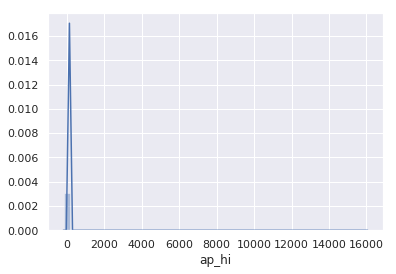

In [39]:
sns.distplot(cardio['ap_hi'])

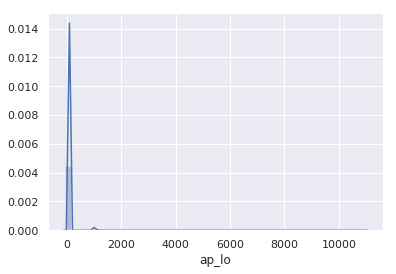

In [40]:
sns.distplot(cardio['ap_lo'])

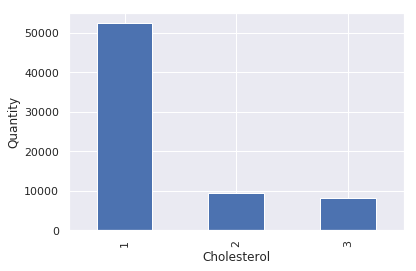

In [41]:
cardio['cholesterol'].value_counts().plot(kind="bar")
plt.ylabel('Quantity')
plt.xlabel('Cholesterol')
plt.show()

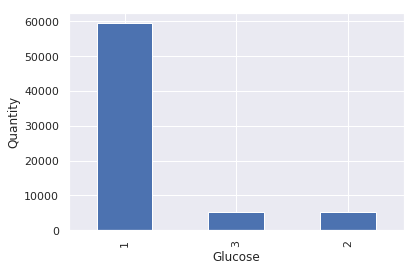

In [42]:
cardio['gluc'].value_counts().plot(kind="bar")
plt.ylabel('Quantity')
plt.xlabel('Glucose')
plt.show()

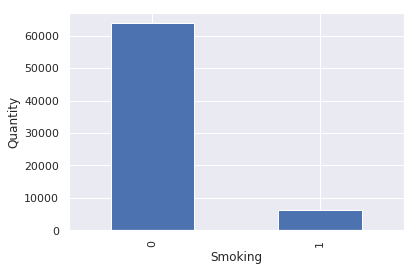

In [43]:
cardio['smoke'].value_counts().plot(kind="bar")
plt.ylabel('Quantity')
plt.xlabel('Smoking')
plt.show()

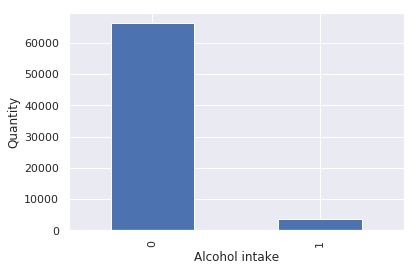

In [44]:
cardio['alco'].value_counts().plot(kind="bar")
plt.ylabel('Quantity')
plt.xlabel('Alcohol intake')
plt.show()

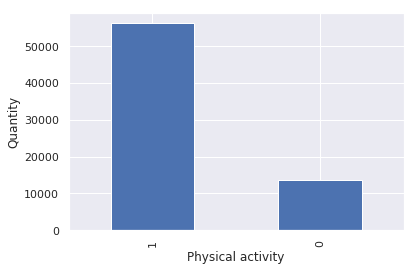

In [45]:
cardio['active'].value_counts().plot(kind="bar")
plt.ylabel('Quantity')
plt.xlabel('Physical activity')
plt.show()

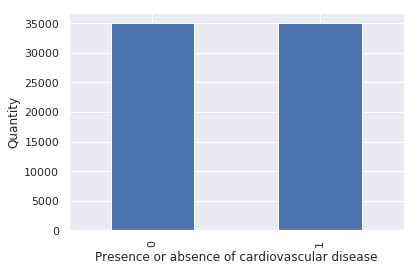

In [46]:
cardio['cardio'].value_counts().plot(kind="bar")
plt.ylabel('Quantity')
plt.xlabel('Presence or absence of cardiovascular disease')
plt.show()

Write some **CONCLUSIONS**

**2)  Split it into a training set and a test set using ```train_test_split``` method from sklearn.**

In [52]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(cardio, test_size=0.2, random_state=145)

df_train.shape

(56000, 13)

In [53]:
df_train.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
35474,50667,21787,2,174,82.0,120,80,2,2,0,0,1,1
45527,65034,23465,1,152,100.0,140,90,1,1,0,0,1,0
1494,2111,18286,2,173,86.0,130,90,2,1,0,1,1,1
64379,91890,20998,1,173,105.0,140,80,1,2,0,0,0,1
67178,95908,18179,1,148,67.0,130,80,1,2,0,0,1,0


In [54]:
df_test.shape

(14000, 13)

In [55]:
df_train.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
35474,50667,21787,2,174,82.0,120,80,2,2,0,0,1,1
45527,65034,23465,1,152,100.0,140,90,1,1,0,0,1,0
1494,2111,18286,2,173,86.0,130,90,2,1,0,1,1,1
64379,91890,20998,1,173,105.0,140,80,1,2,0,0,0,1
67178,95908,18179,1,148,67.0,130,80,1,2,0,0,1,0


**3) Use grid search with cross-validation (with  the  help  of  the ```GridSearchCVmethod``` from sklearn) to find good hyperparameter values for a ```DecisionTreeClassifier```.Hint: try various values for ```maxleafnodes```.**

**4) Train it on the full training set using these hyperparameters, and measure your model’s performance on the test set.** 